# Main Objectives:  
The scope of this project is to perform Short Term Load Forcast using LSTM and further compare with ANN and RNN models.This can be broken down into the following milestones:  

1. Data Exploration and evaluation of Stationarity.  
2. Modeling and selection of best model.  
3. Prediction of future values.

# 1. Data Exploration and evaluation of Stationarity.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

df=pd.read_csv(r'D:\MTech pro\STLF_DATA1.csv')

In [2]:
""""
df['0'].replace(to_replace=0,value=df['0'].mean, inplace=True)
df['1'].replace(to_replace=0,value=df['1'].mean, inplace=True)
df['2'].replace(to_replace=0,value=df['2'].mean, inplace=True)
df['3'].replace(to_replace=0,value=df['3'].mean, inplace=True)
df['4'].replace(to_replace=0,value=df['4'].mean, inplace=True)
df['5'].replace(to_replace=0,value=df['5'].mean, inplace=True)
df['6'].replace(to_replace=0,value=df['6'].mean, inplace=True)
df['7'].replace(to_replace=0,value=df['7'].mean, inplace=True)
df['8'].replace(to_replace=0,value=df['8'].mean, inplace=True)
df['9'].replace(to_replace=0,value=df['9'].mean, inplace=True)
df['10'].replace(to_replace=0,value=df['10'].mean, inplace=True)
df['11'].replace(to_replace=0,value=df['11'].mean, inplace=True)
df['12'].replace(to_replace=0,value=df['12'].mean, inplace=True)
df['13'].replace(to_replace=0,value=df['13'].mean, inplace=True)
df['14'].replace(to_replace=0,value=df['14'].mean, inplace=True)
df['15'].replace(to_replace=0,value=df['15'].mean, inplace=True)
df['16'].replace(to_replace=0,value=df['16'].mean, inplace=True)
df['17'].replace(to_replace=0,value=df['17'].mean, inplace=True)
df['18'].replace(to_replace=0,value=df['18'].mean, inplace=True)
df['19'].replace(to_replace=0,value=df['19'].mean, inplace=True)
df['20'].replace(to_replace=0,value=df['20'].mean, inplace=True)
df['21'].replace(to_replace=0,value=df['21'].mean, inplace=True)
df['22'].replace(to_replace=0,value=df['22'].mean, inplace=True)
df['23'].replace(to_replace=0,value=df['23'].mean, inplace=True)
"""

'"\ndf[\'0\'].replace(to_replace=0,value=df[\'0\'].mean, inplace=True)\ndf[\'1\'].replace(to_replace=0,value=df[\'1\'].mean, inplace=True)\ndf[\'2\'].replace(to_replace=0,value=df[\'2\'].mean, inplace=True)\ndf[\'3\'].replace(to_replace=0,value=df[\'3\'].mean, inplace=True)\ndf[\'4\'].replace(to_replace=0,value=df[\'4\'].mean, inplace=True)\ndf[\'5\'].replace(to_replace=0,value=df[\'5\'].mean, inplace=True)\ndf[\'6\'].replace(to_replace=0,value=df[\'6\'].mean, inplace=True)\ndf[\'7\'].replace(to_replace=0,value=df[\'7\'].mean, inplace=True)\ndf[\'8\'].replace(to_replace=0,value=df[\'8\'].mean, inplace=True)\ndf[\'9\'].replace(to_replace=0,value=df[\'9\'].mean, inplace=True)\ndf[\'10\'].replace(to_replace=0,value=df[\'10\'].mean, inplace=True)\ndf[\'11\'].replace(to_replace=0,value=df[\'11\'].mean, inplace=True)\ndf[\'12\'].replace(to_replace=0,value=df[\'12\'].mean, inplace=True)\ndf[\'13\'].replace(to_replace=0,value=df[\'13\'].mean, inplace=True)\ndf[\'14\'].replace(to_replace=0,valu

In [3]:
#df.to_csv('STLF_DATA1.csv')

In [4]:
from keras.optimizers import Adam
import statistics

In [5]:
df.head()

,Unnamed: 0,Country,Year,Month,Day,Date,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
0,0,AT,2006,1,1,1/1/2006,6297,6005,5743,5397,...,6247,6231,6603,6979,7022,6930,6560,6170,6501,6168
1,1,AT,2006,1,2,1/2/2006,5900,5643,5524,5372,...,8190,8168,8469,8735,8617,8218,7773,7247,7413,6926
2,2,AT,2006,1,3,1/3/2006,6483,6192,5991,5773,...,8112,8055,8342,8670,8534,8203,7745,7214,7397,6981
3,3,AT,2006,1,4,1/4/2006,6522,6217,6027,5802,...,8145,8081,8331,8470,8460,8185,7759,7242,7441,6981
4,4,AT,2006,1,5,1/5/2006,6575,6237,6065,5841,...,8046,8042,8268,8361,8453,8114,7606,7139,7333,6888


In [6]:
df.shape

(3652, 30)

Our dataset contains 30 columns of indicators and date columns which will be then set as index. Now let's see if the dates are unique or if there are duplicate values.

In [7]:
len(df['Date'].unique())

3652

As there are 3652 unique sates means that each one corresponds to unique records in the table, therefore we don't have duplicated or inconsistent values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3652 non-null   int64 
 1   Country     3651 non-null   object
 2   Year        3652 non-null   int64 
 3   Month       3652 non-null   int64 
 4   Day         3652 non-null   int64 
 5   Date        3652 non-null   object
 6   0           3652 non-null   int64 
 7   1           3652 non-null   int64 
 8   2           3652 non-null   object
 9   3           3652 non-null   int64 
 10  4           3652 non-null   int64 
 11  5           3652 non-null   int64 
 12  6           3652 non-null   int64 
 13  7           3652 non-null   int64 
 14  8           3652 non-null   int64 
 15  9           3652 non-null   int64 
 16  10          3652 non-null   int64 
 17  11          3652 non-null   int64 
 18  12          3652 non-null   int64 
 19  13          3652 non-null   int64 
 20  14      

In [9]:
df.isnull().sum()

Unnamed: 0    0
Country       1
Year          0
Month         0
Day           0
Date          0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
dtype: int64

As the date column is wrongly set as object type, let's change it to Datetime type:

In [10]:
df.Date=pd.to_datetime(df['Date'])

In [11]:
df.Date.min(),df.Date.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2015-12-31 00:00:00'))

Let's compute the amount of days between the limits in the table, i.e. 2015-12-31/2006-01-01, take into account that the result will give us the days-1:

In [12]:
df.Date.max()-df.Date.min()

Timedelta('3651 days 00:00:00')

Setting the date as index will make our time series plots much more understandable.

In [13]:
df.set_index('Date',inplace=True)

In [14]:
df.head()

,Unnamed: 0,Country,Year,Month,Day,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,0,AT,2006,1,1,6297,6005,5743,5397,5213,...,6247,6231,6603,6979,7022,6930,6560,6170,6501,6168
2006-01-02,1,AT,2006,1,2,5900,5643,5524,5372,5481,...,8190,8168,8469,8735,8617,8218,7773,7247,7413,6926
2006-01-03,2,AT,2006,1,3,6483,6192,5991,5773,5849,...,8112,8055,8342,8670,8534,8203,7745,7214,7397,6981
2006-01-04,3,AT,2006,1,4,6522,6217,6027,5802,5866,...,8145,8081,8331,8470,8460,8185,7759,7242,7441,6981
2006-01-05,4,AT,2006,1,5,6575,6237,6065,5841,5887,...,8046,8042,8268,8361,8453,8114,7606,7139,7333,6888


Let's plot 24 of the indicators in the table and differentiate their corresponding curves by colours.

<AxesSubplot:xlabel='Date'>

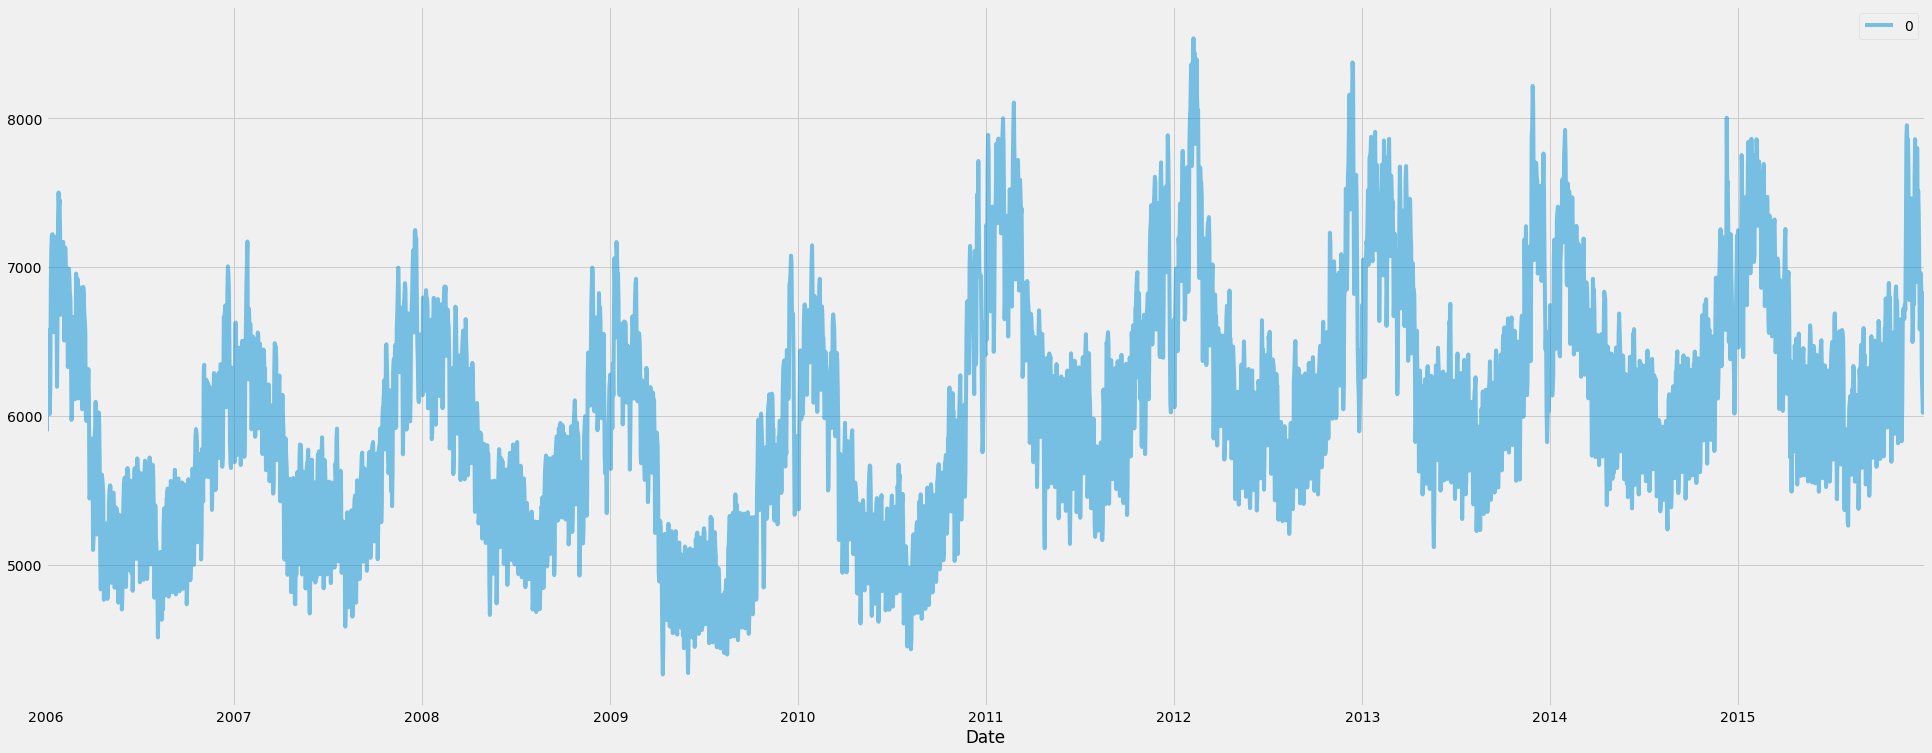

In [15]:
#df[['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']].plot(figsize = (30, 12), alpha = 0.5)
df[['0']].plot(figsize = (30, 12), alpha = 0.5)

In [16]:
#df.iloc[0:3653,5:8].plot(figsize = (20,10))
#print(df.iloc[0:6])

Firstly, we will demonstrate if the time-series problem corresponds to a Non-Stationary type, which characterizes for having:  
- Non-constant variance.  
- Non-constant mean.  
- Seasonality.  
- High autocorrelation. 

There are four well known ways to evaluate if the serie meets the criteria just mentioned, these corresponds to:  
- Sequence visualization.
- Histogram, Autocorrelation and Partial Aurocorrelation plots.
- Statistical summary of chunks.
- Adfuller test.

## Evaluating Stationarity:
The following histogram plot should have a uniform distribution meaning non-constant mean or 'trend':

<AxesSubplot:>

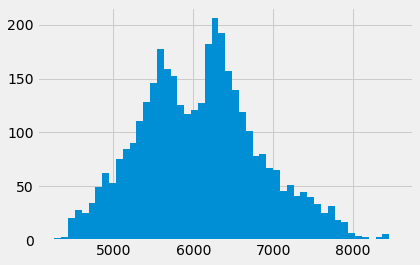

In [17]:
df['0'].hist(bins=50)

Setting the date as index will make our time series plots much more understandable.

We can't assume a uniform nor normal distribution in the plot above, because of that the statistical summary can helps us more, for this we will split the data into 10 chunks and compute mean and variance of each one.

In [18]:
np.round(df.shape[0]/10,0)

365.0

In [19]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df['0'].iloc[i*365:i*365+365].mean())
    std.append(stdev(df['0'].iloc[(i*365):(i*365)+365]))

In [20]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,5767.912329,676.452396
1,5804.613699,578.482603
2,5804.958904,543.927275
3,5483.515068,693.264869
4,5688.767123,672.809648
5,6462.945205,685.469477
6,6462.879452,724.487266
7,6510.021918,682.540748
8,6368.772603,547.964390
9,6520.942466,621.883089


Above we see how both measures are clearly different in each chunk. However looking at the plot we could assume a constant variance as the ripple in the curve, but without a doubt trend is the most outstanding feature. Until now can assume it's a non-stationary serie, but to know more about it we will evaluate two other methods.  
Seasonal decomposition is a function from statsmodels library which allows us to decompose the series into trend, seasonal and residual, either additive or multiplicative:

https://towardsdatascience.com/multi-seasonal-time-series-decomposition-using-mstl-in-python-136630e67530
https://miro.medium.com/max/850/1*a6R1ZZN9gdooJBlHF-qoiw.png

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

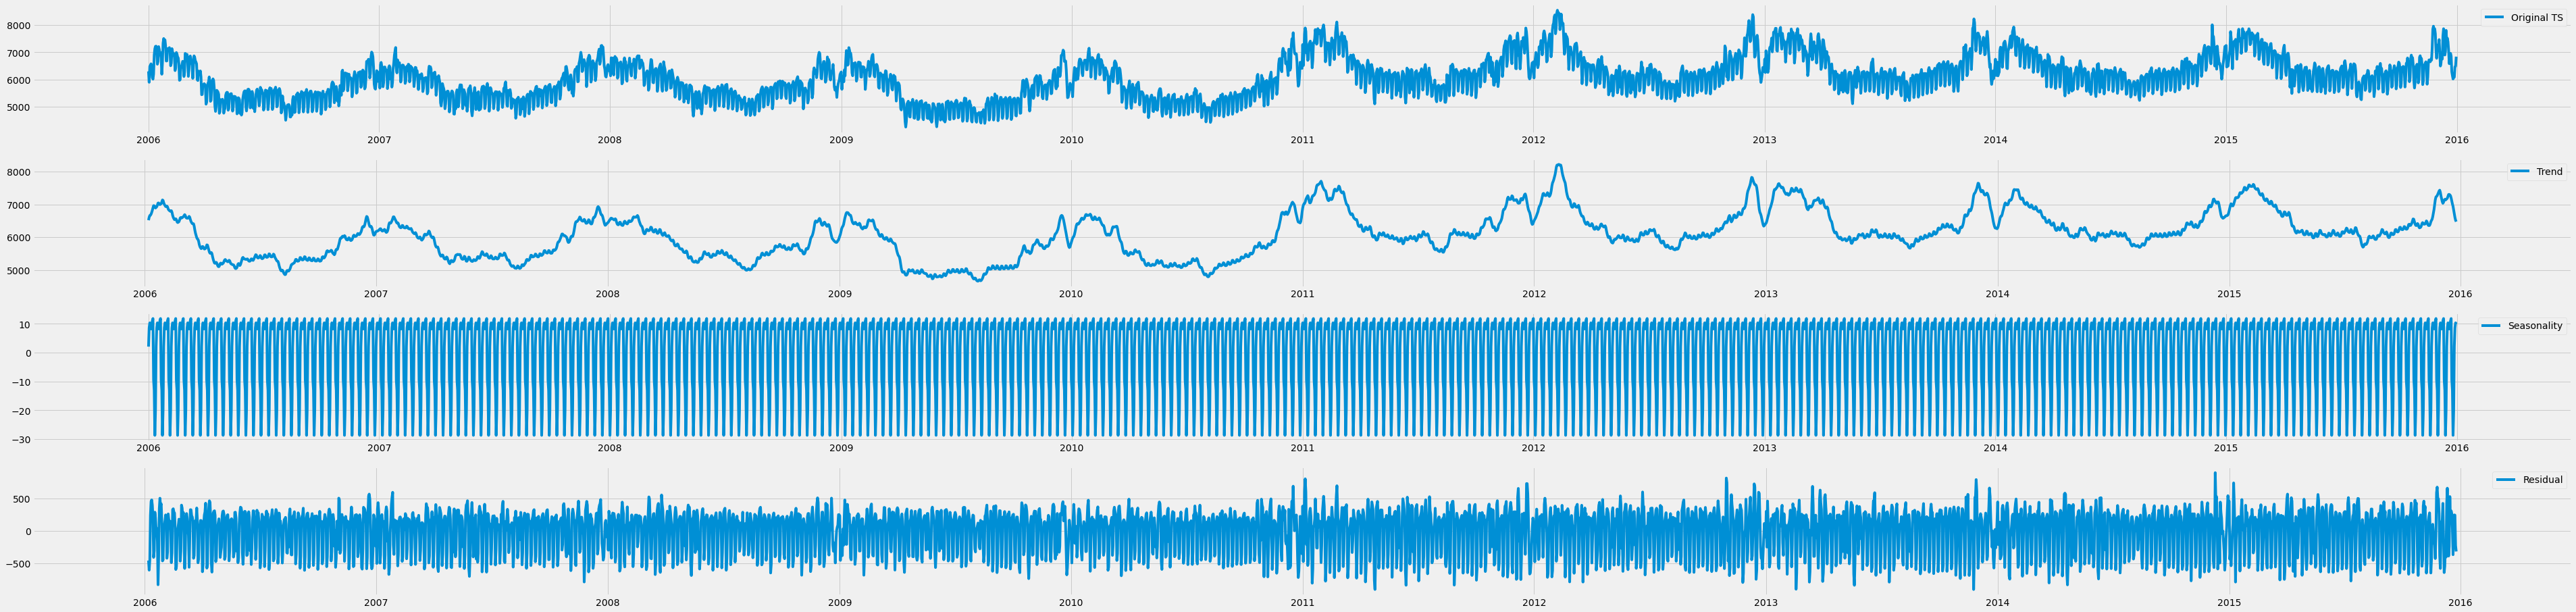

In [22]:
decompose_add=seasonal_decompose(df['0'], model='additive', period=12)
plt.figure(figsize=(60,15))
plt.subplot(411)
plt.plot(df['0'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

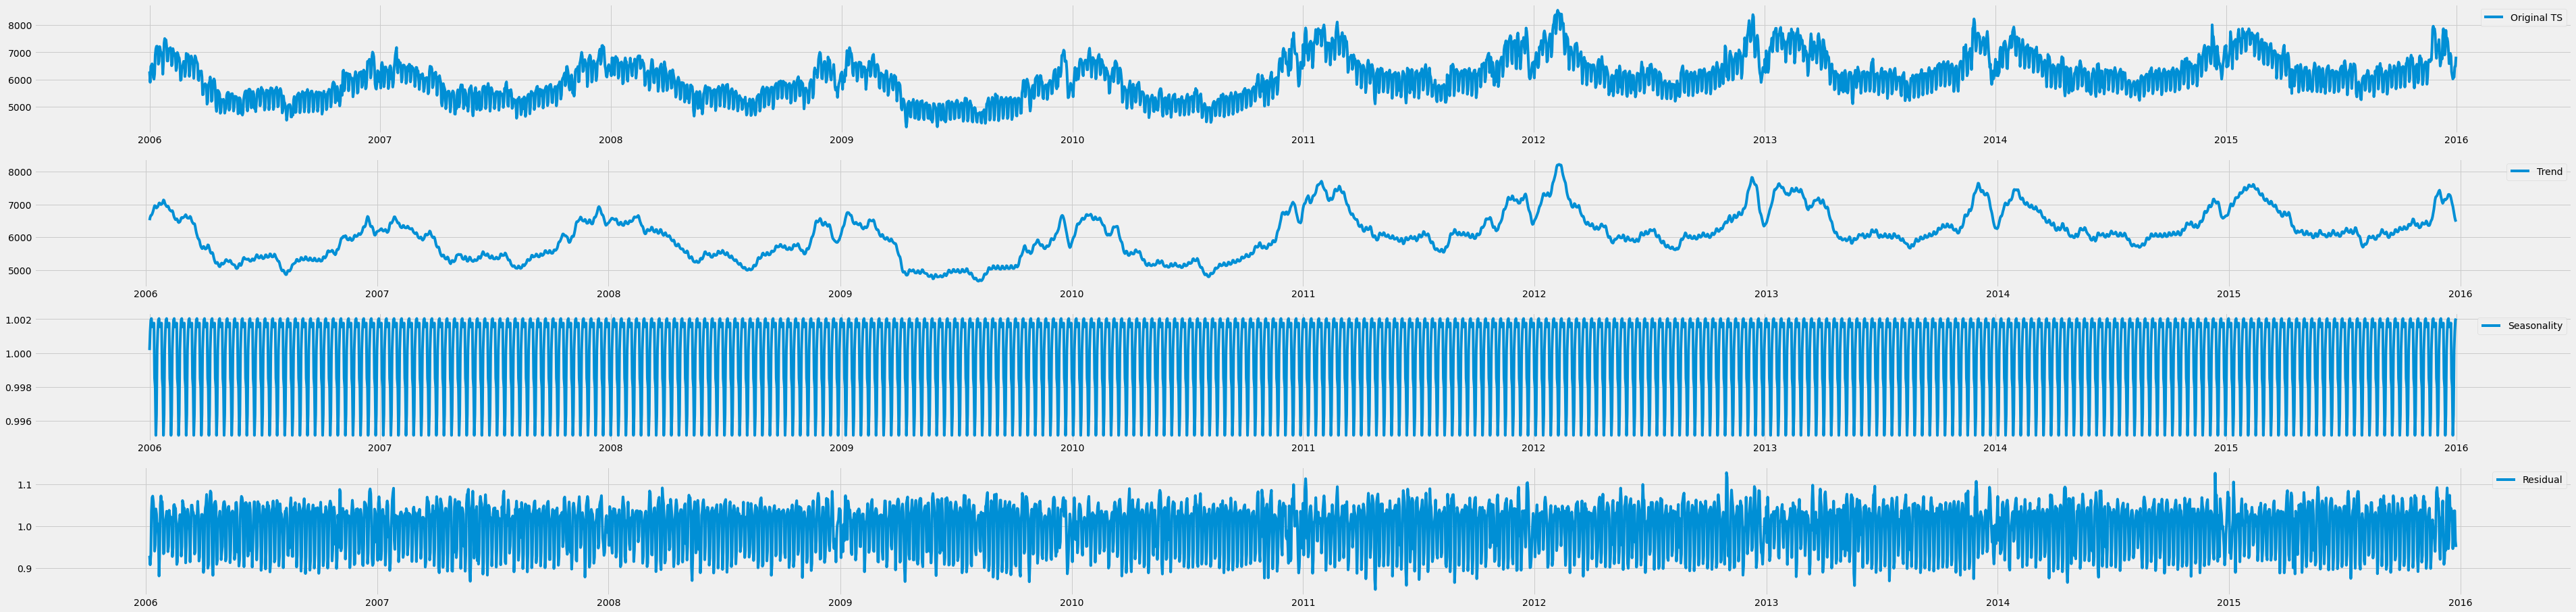

In [23]:
decompose_mul=seasonal_decompose(df['0'], model='multiplicative', period=12)
plt.figure(figsize=(60,15))
plt.subplot(411)
plt.plot(df['0'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul.resid, label='Residual')
plt.legend(loc='best')

Looking carefully to the original curve we can say the additive decomposition makes more sense as the trend does not seem to be changing by the multiplication with seasonal component, rather every component seems to being added up to create the original curve. Independent of this there is a trend and seasonal component.  
Below we can see the ACF and PACF plots:

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

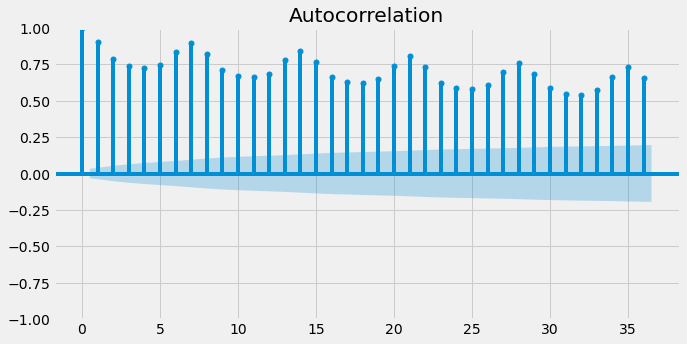

In [25]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['0'],alpha =0.05)
print()

c:\Users\Z0172725\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


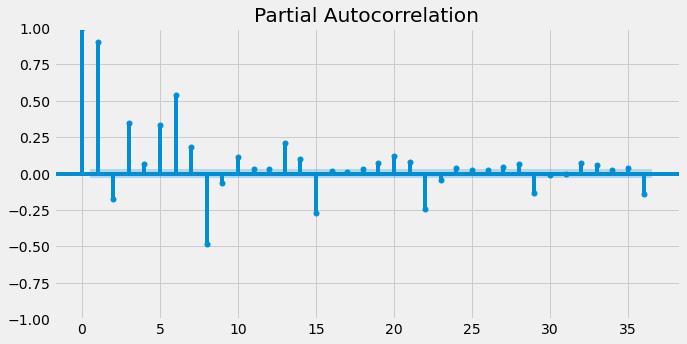

In [26]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df['0'])
print()

Finally, we will make the Augmented Dickey-Fuller test, using 5% as significance level and declaring the following hypothesis:
- H0= Serie corresponds to non-stationary type.
- H1= Serie corresponds to stationary type.

In [27]:
from statsmodels.tsa.stattools import adfuller

The P-value is known as the probability value. It is defined as the probability of getting a result that is either the same or more extreme than the actual observations. The P-value is known as the level of marginal significance within the hypothesis testing that represents the probability of occurrence of the given event. The P-value is used as an alternative to the rejection point to provide the least significance at which the null hypothesis would be rejected. If the P-value is small, then there is stronger evidence in favour of the alternative hypothesis.

## P-value - Decision
P-value > 0.05 = The result is not statistically significant and hence don’t reject the null hypothesis.

P-value < 0.05 = The result is statistically significant. Generally, reject the null hypothesis in favour of the alternative hypothesis.

P-value < 0.01 = The result is highly statistically significant, and thus rejects the null hypothesis in favour of the alternative hypothesis.
https://byjus.com/maths/p-value/



In [28]:
result = adfuller(df['0'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.952501
p-value: 0.001681
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


The p-value is less than 0.01. Rejects the null hypothesis. 

https://blog.quantinsti.com/stationarity/#:~:text=Stationary%20Time%20Series%20and%20Non-Stationary%20Time%20Series%20,a%20%20...%20%201%20more%20rows%20

# 2. Modeling and selection of best model.  
In order to choose the best model 4 changes in hyperparameters and architecture will be applied and then evaluate each one by computing their corresponding error metrics. The purpose of this method is to find the appropriate characteristics of the model by looking at the effect of regularization, window length, number of epochs and type of cell. Each step will be denominated ‘comparison’ and are detailed as follows:  

● 1st comparison, model with 10 different window length.  
● 2nd comparison, model with more layers, neurons and epochs.  
● 3rd comparison, model with regularization.  
● 4th comparison, model using SimpleRNN vs LSTM.  

Firstly, we will define a new dataset equal to the existing one, but omitting the last 10 records, later we will use the model to predict such values.

In [29]:
new_df=df['0'].iloc[:-10]

In [30]:
new_df.shape

(3642,)

We define the length of the training set as 95% of the total records (specifically the first 95% of data, i.e.: from record 0 to record 2915):

In [31]:
train_len = math.ceil(len(new_df)*0.95)
train_len

3460

In [32]:
#Let's use 10 as a random window to be used in the model to build:
window=10

The following lines create the training sets, as we now the first row takes the first 10 time steps and then the second row takes time steps shifted in one and so on and so forth:

In [33]:
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [34]:
X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train.shape, Y_train.shape

((3450, 10), (3450,))

In [35]:
#Reshaping the training set to (number of records-window, number of time steps, 1):

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3450, 10, 1)

## Model
The following is the first model to be used, this is relatively simple with one LSTM layer with relu activation function and one hidden fully connected layer, the optimizer used is Adam, number of epochs=10, batch_size=10 and loss function=Mean squared error:

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [37]:
X_train.shape

(3450, 10, 1)

In [38]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


Creating the validation set using same logic as training:

In [39]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [40]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [41]:
X_val.shape, Y_val.shape

((182, 10, 1), (182,))

Now that our validation set has the correct shape we can use it in the model to predict the next value.

In [42]:
prediction = model.predict(X_val)

6/6 [==============================] - 0s 2ms/step


In [43]:
len(prediction), len(Y_val)

(182, 182)

As our prediction and actual values have the same shape we can use these sets to compute the error metrics, in this case we will use RMSE.

In [44]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

6/6 [==============================] - 0s 2ms/step
Train rmse: 248.75377257151285
Validation rmse: 256.40937656643916


Both errors are high, if we specifically see the validation one we could say it's too much and we aim to improve this as we build a robust model in the next steps.  
Below is a table which merged the actual and predicted values, therefore we can see for each record how differ these two and have an idea of how sidetracked we currently are.

In [45]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,0,Predictions
Date,,
2015-06-23,6259,5911.857422
2015-06-24,6305,6289.615234
2015-06-25,6295,6324.028320
2015-06-26,6273,6158.589844
2015-06-27,6064,6011.950684
...,...,...
2015-12-17,7515,7427.412109
2015-12-18,7381,7640.179199
2015-12-19,7058,7240.871094


Below we can see a simple plot showing both curves, in which clearly there is a difference and a sort of shift to the right or delay in the prediction curve.

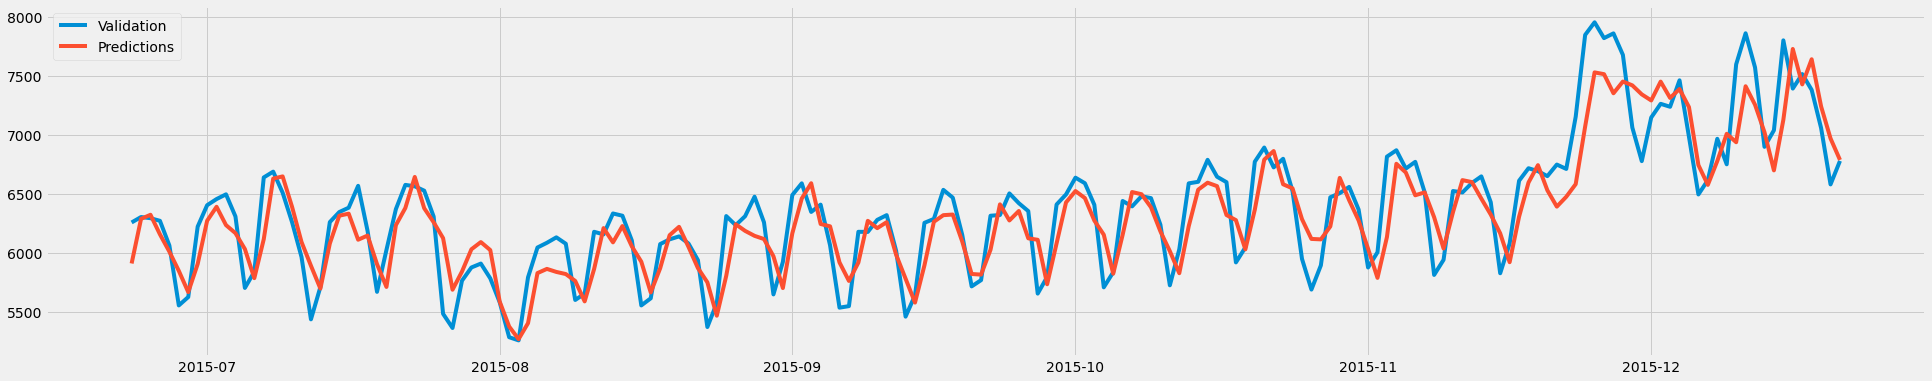

In [46]:
plt.figure(figsize=(30,6))
plt.plot(valid[['0','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Finally, the plot showing training, validation and prediction curves:

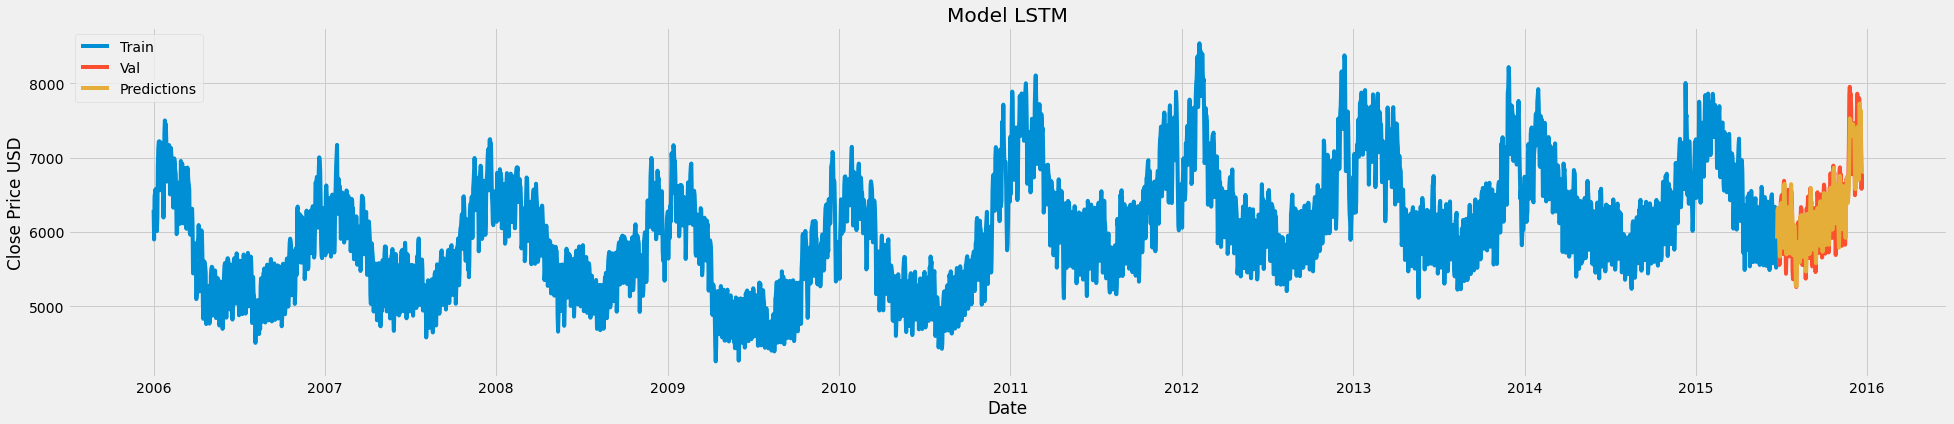

In [47]:
train = new_df[:train_len]
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(30,6))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train)
plt.plot(valid[['0','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

## 1st comparison:  
In order to tackle down this 'shift' and thus reduce the error we have to find the suit window number, for this we will compute the RMSE for the following number of windows: 5,8,10,15,20,30,40,50,60,70. Then compare results and find the lowest.  

In [48]:
train_error=[]
val_error=[]

window_number=[5,8,10,15,20,30,40,50,60,70]
for i in window_number:
    #_____________________________________________________________________
    train_data = new_df[0:train_len]

    X_train=[]
    Y_train=[]

    for i in range(window, len(train_data)):
        X_train.append(train_data[i-window:i])
        Y_train.append(train_data[i])

    X_train, Y_train= np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    #______________________________________________________________________
    test_data = new_df[train_len-window:]

    X_val=[]
    Y_val=[] 

    for i in range(window, len(test_data)):
        X_val.append(test_data[i-window:i])
        Y_val.append(test_data[i])

    X_val, Y_val = np.array(X_val), np.array(Y_val)
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
    #______________________________________________________________________
    model=Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
    #______________________________________________________________________
    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    train_error.append(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
    val_error.append(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

6/6 [==============================] - 0s 2ms/step


The following table shows the RMSE of train and validation sets for each of the 13 windows:

In [49]:
pd.concat([pd.DataFrame(train_error,columns=['train_error']),
           pd.DataFrame(val_error,columns=['val_error']),
           pd.DataFrame([5,8,10,15,20,30,40,50,60,70],columns=['window'])], axis=1).set_index('window')

,train_error,val_error
window,,
5,366.456804,412.427405
8,316.366532,328.119552
10,370.891717,391.524989
15,340.715168,376.248945
20,307.173480,327.739927
30,396.060964,426.492373
40,273.948774,284.407511
50,429.591798,472.058861
60,377.820147,410.119896


**Note: Each time that I ran the prior code of 10 windows the outcome was different**, but in general the behaviour was as in the table above, having window=15 the lowest RMSE for validation set. Thus this number was chosen as the best predictor. Even though before we have seen how for this value the shift was significant for all other windows this difference was much more, but there are still more hyperparameters to tune in order to improve the accuracy.

## 2nd comparison:  
One efficient way to improve the accuracy is by simply increasing the complexity of the model and this can be achieved adding more layers and more LSTM cells. Therefore in this step we will build a multilayered model and compare its performance with the prior.  
Firstly, let's create again the training and validation sets for 10 windows to be used.


In [50]:
window=15

train_data = new_df[0:train_len]
X_train=[]
Y_train=[]
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#____________________________________________________________________
test_data = new_df[train_len-window:]
X_val=[]
Y_val=[] 
for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])
    
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

The following is the architecture of the model to be used (2 LSTM layers and 2 hidden fully-connected layers), the optimizer is more specific and the number of epochs was increased to 100:

In [51]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.summary()
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 15, 50)            10400     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dense_22 (Dense)            (None, 100)               5100      
                                                                 
 dense_23 (Dense)            (None, 25)                2525      
                                                                 
 dense_24 (Dense)            (None, 1)                 26        
                                                                 
Total params: 38,251
Trainable params: 38,251
Non-trainable params: 0
_________________________________________________________________


In the summary above we can see that the total parameters of this new model is three times or even more than the prior which is indicative of the complexity and the time it takes to train.

In [52]:
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

6/6 [==============================] - 0s 3ms/step
Train rmse: 215.0458415643107
Validation rmse: 207.71048996970782


In [53]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

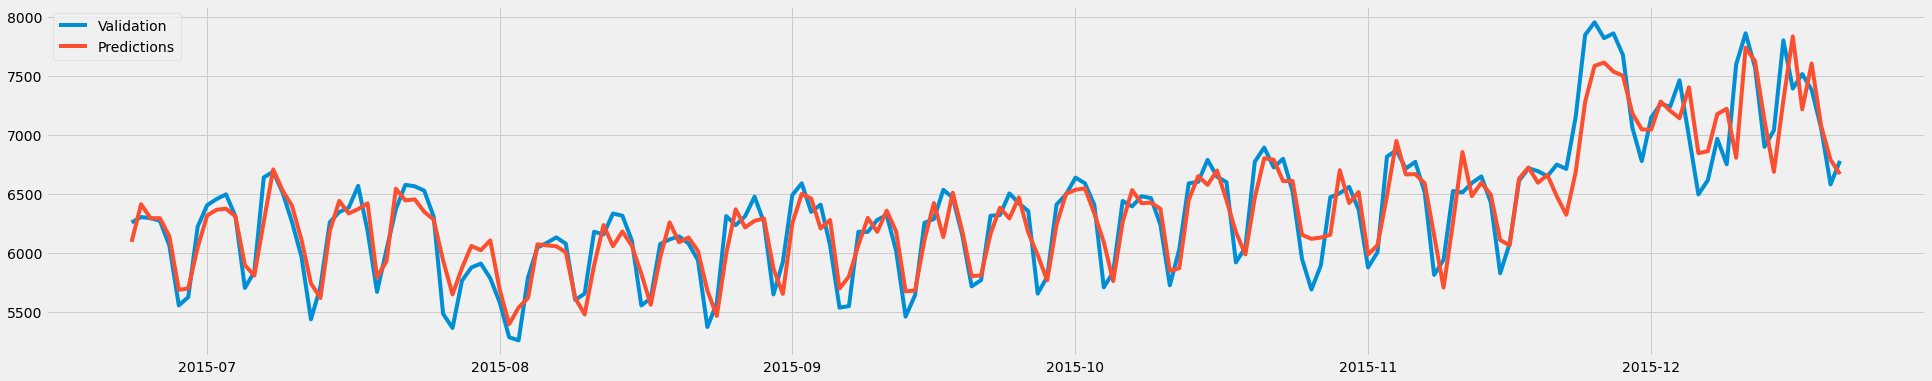

In [54]:
plt.figure(figsize=(30,6))
plt.plot(valid[['0','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Despite the fact that error metrics were lower than before in the plot above still can see a gap between the actual and predicted values. Again, I've found that each time I ran this model the results were different and the current output corresponds to the very best one, but in order to better vizualize this I will run 10 times the same model and compute the errors in each one.

In [55]:
r1=[]
r2=[]

for i in range(0,5):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

6/6 [==============================] - 0s 3ms/step


Below we can see the RMSE for each time, note that these are considerably different, being still more impactful in the validation set.

In [56]:
r1, statistics.mean(r1), statistics.stdev(r1)

([350.77, 214.03, 201.89, 220.76, 207.09], 238.908, 62.93665323164236)

In [57]:
r2, statistics.mean(r2), statistics.stdev(r2)

([337.8, 218.22, 193.51, 213.68, 203.23], 233.288, 59.20314408880664)

We can see how validation errors are higher than training and also more spreaded because of such stardard deviation.

## 3rd comparison:   
As the validation errors were still considerably higher than training we think one reason could be due to overfitting and for this problem we have to add regularization to the model chosen by using **Dropout** after Fully Connected layers and LSTM cells. In this step we will run a regularized model again 10 times in order to see the variation in the results:

In [58]:
r1=[]
r2=[]

for i in range(0,5):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1),recurrent_dropout=0.2))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

6/6 [==============================] - 0s 4ms/step


In [59]:
r1, statistics.mean(r1), statistics.stdev(r1)

([475.74, 552.32, 230.01, 245.92, 405.26], 381.85, 141.38222271558757)

In [60]:
r2, statistics.mean(r2), statistics.stdev(r2)

([517.53, 518.64, 218.35, 254.77, 402.82],
 382.42199999999997,
 141.8099501798093)

We can see above how these values either training or validation were higher than without dropout, which is definitely not good.  
**Note:** Different levels of dropout were used above from 0.1 to 0.6 obtaining similar or higher errors. Now that we saw dropout did not reduce the errors we can not attribute the problem to overfitting and a different approach must be taken. For your consideration I have also changed the optimizer to Adadelta, Adamax, RMSProp and SGD but everyone had higher error or simply did not work, the activation function was changed to tanh and sigmoid obtaining similar errors.


## 4th comparison:  
Until now every model built does not offer us a good accuracy, as we are dealing with the budget of a company this results can lead to a completely wrong decision, but as I said there is still a room of improvement and different approaches must be taken. We were forgeting the simplest type of RNN which is known for being more affected by vanishing gradient, however for our dataset it worked as follows (Again the model will be run 10 times):

In [61]:
from keras.layers import SimpleRNN

In [62]:
r1=[]
r2=[]

for i in range(0,5):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

6/6 [==============================] - 0s 2ms/step


In [63]:
r1, statistics.mean(r1), statistics.stdev(r1)

([213.55, 219.34, 183.66, 172.72, 185.25], 194.904, 20.3503594562848)

In [64]:
r2, statistics.mean(r2), statistics.stdev(r2)

([218.95, 217.05, 181.68, 164.16, 177.82], 191.932, 24.68006422195858)

**Even less than half the prior error metrics and what is more important is the fact that stardard deviation is much lower, which tells us that the model offer a more stable performance using RNNs rather than LSTMs.**  

Let's plot the actual and predicted values for the validation set and see how reduced was the 'shift':

In [65]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,0,Predictions
Date,,
2015-06-23,6259,6241.125488
2015-06-24,6305,6440.513184
2015-06-25,6295,6383.675781
2015-06-26,6273,6333.124512
2015-06-27,6064,6161.069824
...,...,...
2015-12-17,7515,7636.698730
2015-12-18,7381,7802.317871
2015-12-19,7058,7309.431641


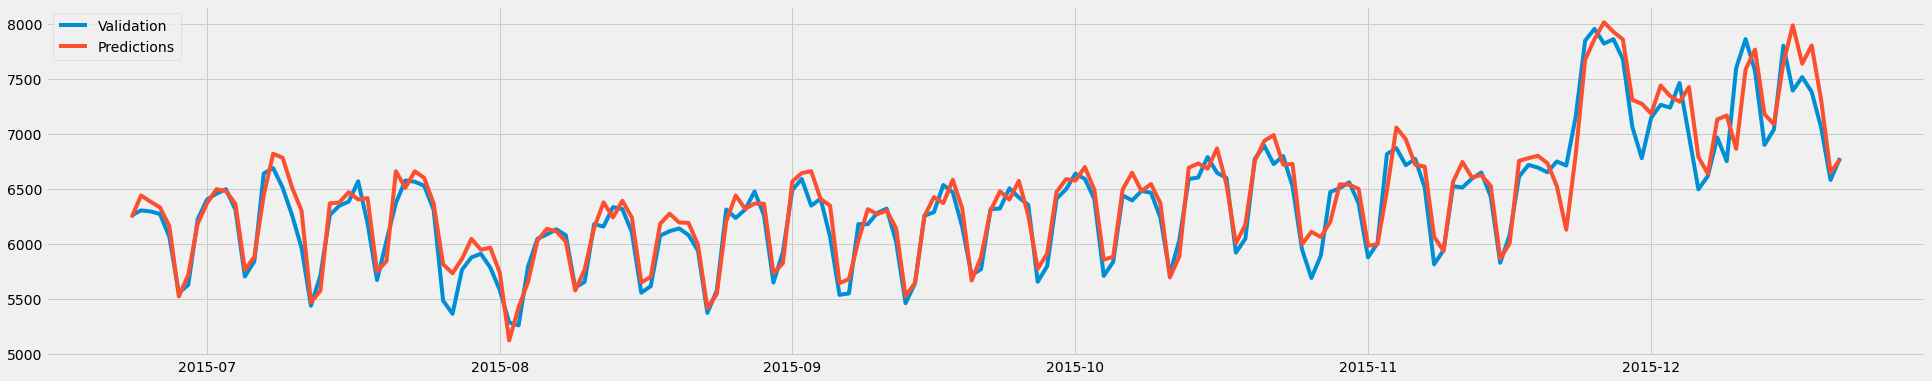

In [66]:
plt.figure(figsize=(30,6))
plt.plot(valid[['0','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Clearly, the gap was reduced significantly and the predicted curve even responded quickly to the 'high frequencies' or a.k.a. ripple in the actual curve. As this model corresponds to the best one we will continue working with this.

In order to get a bit better results from the previous model I will use a callback to find the learning rate wich offers the lowest MSE loss. I have already shorten the range to [1e-5 - 1e-3] and found that around 1e-4 and beta2 = 0.7 occurrs the lowest error, therefore these were chosen to rebuild the model:

In [67]:
import tensorflow 

r1=[]
r2=[]

model=Sequential()
model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
model.add(Dense(150))
model.add(Dense(50))
model.add(Dense(1))
lr_schedule = tensorflow.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 85))
opt1=Adam(learning_rate=1e-5,beta_1=0.9,beta_2=0.7)
model.compile(loss='mean_squared_error', optimizer=opt1)
history=model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=2, callbacks=[lr_schedule])

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
r_train_new=np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2)
r_val_new=np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2)

Epoch 1/100
345/345 - 2s - loss: 21421252.0000 - lr: 1.0000e-05 - 2s/epoch - 7ms/step
Epoch 2/100
345/345 - 1s - loss: 442934.0938 - lr: 1.0275e-05 - 966ms/epoch - 3ms/step
Epoch 3/100
345/345 - 1s - loss: 100496.7266 - lr: 1.0557e-05 - 998ms/epoch - 3ms/step
Epoch 4/100
345/345 - 1s - loss: 78234.3672 - lr: 1.0847e-05 - 988ms/epoch - 3ms/step
Epoch 5/100
345/345 - 1s - loss: 66465.1172 - lr: 1.1144e-05 - 1s/epoch - 3ms/step
Epoch 6/100
345/345 - 1s - loss: 58382.1094 - lr: 1.1450e-05 - 1s/epoch - 3ms/step
Epoch 7/100
345/345 - 1s - loss: 53434.2188 - lr: 1.1765e-05 - 1s/epoch - 3ms/step
Epoch 8/100
345/345 - 1s - loss: 49514.4258 - lr: 1.2088e-05 - 1s/epoch - 3ms/step
Epoch 9/100
345/345 - 1s - loss: 47062.6680 - lr: 1.2420e-05 - 1s/epoch - 3ms/step
Epoch 10/100
345/345 - 1s - loss: 45785.3164 - lr: 1.2761e-05 - 994ms/epoch - 3ms/step
Epoch 11/100
345/345 - 1s - loss: 44802.9492 - lr: 1.3111e-05 - 1s/epoch - 3ms/step
Epoch 12/100
345/345 - 1s - loss: 43959.9453 - lr: 1.3471e-05 - 1s/e

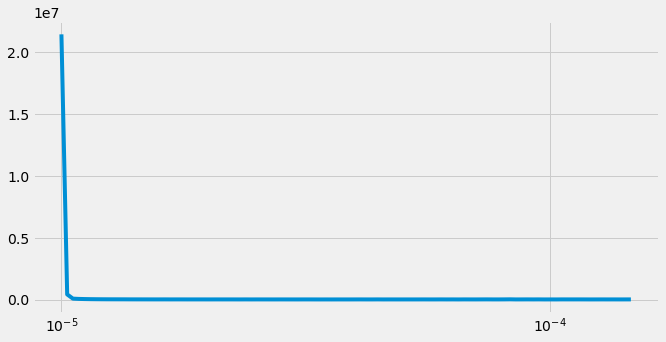

In [68]:
plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-5, 5e-4, 0, 1000])
#plt.axis([0, 5e-5, 0, 1000])

In [69]:
r_train_new, r_val_new

(206.95, 200.46)

# 3. Prediction of future values.

As we have values until 6/23/2015 we can predict the next one using the model built and compare the outcome with the actual value saved in the original dataframe 'df':

In [70]:
new_df

Date
2006-01-01    6297
2006-01-02    5900
2006-01-03    6483
2006-01-04    6522
2006-01-05    6575
              ... 
2015-12-17    7515
2015-12-18    7381
2015-12-19    7058
2015-12-20    6581
2015-12-21    6780
Name: 0, Length: 3642, dtype: int64

In [71]:
last_15_days=new_df[-15:].values
X_test=[]
X_test.append(last_10_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

NameError: name 'last_10_days' is not defined

Now, let's find the corresponding actual value in df:

In [ ]:
df['0'].iloc[-10]

6958

In [ ]:
df['0'].iloc[-10]-pred_price

array([[-236.44238]], dtype=float32)

Predicting 10 future values:

In [ ]:
df['0'].tail(25)

Date
2015-12-07    6617
2015-12-08    6967
2015-12-09    6751
2015-12-10    7597
2015-12-11    7860
2015-12-12    7571
2015-12-13    6899
2015-12-14    7039
2015-12-15    7800
2015-12-16    7392
2015-12-17    7515
2015-12-18    7381
2015-12-19    7058
2015-12-20    6581
2015-12-21    6780
2015-12-22    6958
2015-12-23    6858
2015-12-24    6285
2015-12-25    6143
2015-12-26    6021
2015-12-27    6070
2015-12-28    6088
2015-12-29    6464
2015-12-30    6489
2015-12-31    6838
Name: 0, dtype: int64

Above, the last 25 values correspond to the actual values we want to predict, and the time steps used does not comprehend these rather will be used the predicted ones as we run the model.  
As we predicted one value (pred_price) the time steps used to predict a new one will take the last 15 of new_df and pred_price, as follows:

In [ ]:
last_14_days=new_df[-14:].values
X_test=[]
X_test=np.append(last_14_days,pred_price)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price2=model.predict(X_test)
print(pred_price2)

1/1 [==============================] - 0s 323ms/step
[[7293.673]]


In [ ]:
df['0'].iloc[-9]

6858

In [ ]:
df['0'].iloc[-3]-pred_price2

array([[-829.67285]], dtype=float32)